In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read file
df = pd.read_csv('data_D.csv',delimiter=',')
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [3]:
df.tail()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
41254,41254,105680,15671769,Nkemdirim,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,41255,70760,15570299,Martin,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,41256,3091,15807593,Tseng,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,41257,20130,15583460,Nwankwo,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0
41258,41258,161328,15681655,Hs?,850.0,France,Male,43.0,2,0.00,2,1,1,93882.93,0


EKSPLORE SEKILAS DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


SPLIT DATASET

In [5]:
input_df = df.drop(['churn'],axis=1)
output_df = df['churn']

In [6]:
input_df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33


In [7]:
output_df.head()

0    0
1    1
2    1
3    0
4    1
Name: churn, dtype: int64

EXPLORE SPLIT DATASET

In [8]:
input_df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [9]:
input_df.nunique()

Unnamed: 0         41259
id                 41259
CustomerId         13272
Surname             2274
CreditScore          442
Geography              3
Gender                 2
Age                   66
Tenure                11
Balance            11389
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    20995
dtype: int64

kolom 'Unnamed: 0', 'id' terlihat mencurigakan

In [10]:
output_df.value_counts()

churn
0    32540
1     8719
Name: count, dtype: int64

In [11]:
# cek apakah ada duplikat data dimasing kolom
input_df[input_df.duplicated()].count()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

dalam setiap kolom tidak terdapat data duplikat

In [12]:
# cek semua unique value di masing-masing kolom
for (columnName, columnData) in input_df.items():
    na_count = columnData.isna().sum()
    unique_count = columnData.unique()
    print(f'{columnName}\'s data type: {columnData.dtypes}')
    print(f'N/A values in {columnName}: {na_count}')
    print(f'{columnName} values: {unique_count}\n')

Unnamed: 0's data type: int64
N/A values in Unnamed: 0: 0
Unnamed: 0 values: [    0     1     2 ... 41256 41257 41258]

id's data type: int64
N/A values in id: 0
id values: [106473  62345 126615 ...   3091  20130 161328]

CustomerId's data type: int64
N/A values in CustomerId: 0
CustomerId values: [15639576 15769582 15675888 ... 15792588 15695096 15583460]

Surname's data type: object
N/A values in Surname: 0
Surname values: ['Sarratt' 'Hanson' 'Austin' ... 'Hobbs' 'Rivero' 'Laurie']

CreditScore's data type: float64
N/A values in CreditScore: 8
CreditScore values: [652. 464. 620. 598. 682. 746. 636. 685. 809. 439. 656. 741. 675. 532.
 616. 669. 756. 705. 662. 635. 753. 576. 487. 697. 718. 556. 717. 711.
 667. 528. 588. 592. 686. 625. 807. 555. 714. 544. 724. 769. 695. 791.
 727. 679. 692. 658. 492. 739. 678. 684. 681. 600. 633. 671. 611. 529.
 590. 543. 758. 710. 774. 709. 567. 648. 453. 637. 726. 704. 646. 535.
 702. 743. 638. 531. 623. 698. 593. 586. 816. 655. 619. 835. 642. 582.
 5

In [13]:
# cek missing value
input_df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

yang dapat disimpulkan sementara:
- semua type data sudah tepat
- terdapat missing value pada kolom 'CreditScore'
- kolom object perlu dilakukan encode

mengecek significant kolom berdasarkan analisis statistic 'Unnamed', 'id', 'CustomerId'

In [14]:
#melihat jumlah kolom Unnamed dan id memiliki unique value yang sama, mari kita coba bandingkan apakah memiliki value yang sama
sama = (input_df['Unnamed: 0'] == input_df['id']).all()

if sama:
    print("Kedua kolom memiliki nilai yang sama.")
else:
    print("Kedua kolom memiliki nilai yang berbeda.")

Kedua kolom memiliki nilai yang berbeda.


kedua kolom memiliki nilai yang berbeda

In [15]:
#cek dari analisis statistik apakah keberadaan kolom Unnamed significan atau tidak
#Unnamed: 0, curiga apakah perlu di drop atau tidak 
deskriptif_dengan_unnamed = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_unnamed = input_df.drop(columns=['Unnamed: 0'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_unnamed = df_without_unnamed.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom Unnamed:")
print(deskriptif_dengan_unnamed)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom Unnamed:")
print(deskriptif_tanpa_unnamed)

Statistik Deskriptif untuk Dataset dengan Kolom Unnamed:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.802930  

Dari perbandingan statistik deskriptif antara dataset dengan kolom "Unnamed" dan dataset tanpa kolom "Unnamed", dapat disimpulkan bahwa keberadaan kolom "Unnamed" tidak berpengaruh signifikan terhadap distribusi atau karakteristik statistik dari dataset. Statistik seperti rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil menunjukkan kesamaan antara kedua dataset, menunjukkan bahwa kolom "Unnamed" kemungkinan hanya merupakan indeks atau penanda baris yang tidak memiliki dampak substansial pada analisis statistik lebih lanjut. Oleh karena itu, kolom "Unnamed" dapat diabaikan dalam analisis lanjutan terhadap dataset tersebut.

In [16]:
#cek dari analisis statistik apakah keberadaan kolom 'id' significan atau tidak, agar dapat di drop
deskriptif_dengan_id = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_id = input_df.drop(columns=['id'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_id = df_without_id.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom Id:")
print(deskriptif_dengan_id)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom Id:")
print(deskriptif_tanpa_id)

Statistik Deskriptif untuk Dataset dengan Kolom Id:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.802930   6285

Statistik deskriptif dari dataset dengan kolom "id" dan dataset tanpa kolom "id" menunjukkan kesamaan dalam sebagian besar aspek, termasuk jumlah data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil dari kolom-kolom numerik. Hal ini menandakan bahwa keberadaan kolom "id" tidak mempengaruhi distribusi atau analisis statistik dari dataset. Meskipun kolom "id" memiliki nilai rata-rata sekitar 82171.69 dan memiliki nilai minimum 3 serta maksimum 165033, perbedaan ini tidak memengaruhi statistik deskriptif lainnya. Oleh karena itu, dalam analisis statistik, kita dapat menggunakan dataset dengan atau tanpa kolom "id" dengan hasil yang konsisten.

In [17]:
#cek dari analisis statistik apakah keberadaan kolom 'Surname' significan atau tidak, agar dapat di drop
deskriptif_dengan_surname = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_surname = input_df.drop(columns=['Surname'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_surname = df_without_surname.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom Surname:")
print(deskriptif_dengan_surname)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom Surname:")
print(deskriptif_tanpa_surname)

Statistik Deskriptif untuk Dataset dengan Kolom Surname:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.802930  

Dari perbandingan statistik deskriptif antara dataset dengan dan tanpa kolom 'Surname', tidak terlihat adanya perubahan yang signifikan dalam distribusi atau karakteristik fitur-fitur lainnya seperti 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', dan 'churn'. Hal ini menunjukkan bahwa keberadaan atau ketiadaan kolom 'surname' tidak memengaruhi statistik deskriptif dari fitur-fitur tersebut, serta variabel target 'churn'. Oleh karena itu, dapat disimpulkan bahwa kolom 'surname' mungkin tidak memberikan kontribusi yang signifikan dalam analisis dataset ini.

In [18]:
#cek dari analisis statistik apakah keberadaan kolom 'Surname' significan atau tidak, agar dapat di drop
deskriptif_dengan_gender = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_gender = input_df.drop(columns=['Gender'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_gender = df_without_gender.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom Gender:")
print(deskriptif_dengan_gender)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom Gender:")
print(deskriptif_tanpa_gender)

Statistik Deskriptif untuk Dataset dengan Kolom Gender:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.802930   

In [19]:
#cek dari analisis statistik apakah keberadaan kolom 'Surname' significan atau tidak, agar dapat di drop
deskriptif_dengan_geography = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_geography = input_df.drop(columns=['Geography'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_geography = df_without_surname.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom Geography:")
print(deskriptif_dengan_geography)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom Geography:")
print(deskriptif_tanpa_geography)

Statistik Deskriptif untuk Dataset dengan Kolom Geography:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.802930

In [20]:
#cek dari analisis statistik apakah keberadaan kolom 'Surname' significan atau tidak, agar dapat di drop
deskriptif_dengan_customerid = input_df.describe()

# Menghapus kolom ZIP Code dari dataset
df_without_customerid = input_df.drop(columns=['CustomerId'])

# Menghitung statistik deskriptif untuk dataset tanpa kolom ZIP Code
deskriptif_tanpa_customerid = df_without_surname.describe()

# Menampilkan perbandingan statistik deskriptif
print("Statistik Deskriptif untuk Dataset dengan Kolom CustomerId:")
print(deskriptif_dengan_customerid)

print("\nStatistik Deskriptif untuk Dataset tanpa Kolom CustomerId:")
print(deskriptif_tanpa_customerid)

Statistik Deskriptif untuk Dataset dengan Kolom CustomerId:
         Unnamed: 0             id    CustomerId   CreditScore           Age  \
count  41259.000000   41259.000000  4.125900e+04  41251.000000  41259.000000   
mean   20629.000000   82171.693231  1.569221e+07    656.278733     38.060254   
std    11910.591715   47498.739183  7.137974e+04     80.062353      8.801094   
min        0.000000       3.000000  1.556570e+07    350.000000     18.000000   
25%    10314.500000   41098.500000  1.563347e+07    598.000000     32.000000   
50%    20629.000000   81851.000000  1.569013e+07    659.000000     37.000000   
75%    30943.500000  123064.500000  1.575714e+07    710.000000     42.000000   
max    41258.000000  165033.000000  1.581569e+07    850.000000     92.000000   

             Tenure        Balance  NumOfProducts     HasCrCard  \
count  41259.000000   41259.000000   41259.000000  41259.000000   
mean       4.999127   55712.496615       1.554328      0.754405   
std        2.80293

dari analisis statistic di atas, kolom 'Unnamed: 0', 'id', dan 'Surname' akan di drop

In [21]:
input_df.drop('Unnamed: 0', axis = 'columns', inplace = True)
input_df.drop('id', axis = 'columns', inplace = True)
input_df.drop('Surname', axis = 'columns', inplace = True)
input_df.drop('Geography', axis = 'columns', inplace = True)
input_df.drop('Gender', axis = 'columns', inplace = True)
input_df.drop('CustomerId', axis = 'columns', inplace = True)
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Age              41259 non-null  float64
 2   Tenure           41259 non-null  int64  
 3   Balance          41259 non-null  float64
 4   NumOfProducts    41259 non-null  int64  
 5   HasCrCard        41259 non-null  int64  
 6   IsActiveMember   41259 non-null  int64  
 7   EstimatedSalary  41259 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.5 MB


Handle missing value

In [22]:
#langsung aja make function ini yang dimana kalo numeric -> mean, kalo string -> modus
def fill_missing_values(data):
    filled_data = data.copy()
    for column in filled_data.columns:
        if filled_data[column].dtype == 'object':
            # Jika tipe data string, isi dengan modus
            mode_val = filled_data[column].mode()[0]
            filled_data[column].fillna(mode_val, inplace=True)
        else:
            # Jika tipe data numerik, isi dengan rata-rata
            mean_val = filled_data[column].mean()
            filled_data[column].fillna(mean_val, inplace=True)
    return filled_data

In [23]:
#cek dulu nihh beneran ada NA gaa di df kita
rows_with_na = input_df[input_df.isna().any(axis=1)]
rows_with_na

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1005,NaN,42.0,0,0.0,2,0,1,140724.64
10439,NaN,22.0,4,0.0,1,1,1,84908.20
12086,NaN,37.0,8,0.0,1,1,1,168816.35
12958,NaN,32.0,9,0.0,1,1,0,156774.75
19481,NaN,39.0,9,0.0,1,1,0,160810.85
28019,NaN,29.0,6,0.0,2,1,0,93874.67
31467,NaN,32.0,4,0.0,2,1,1,131953.94
33357,NaN,32.0,4,0.0,1,1,0,160523.87


terlihat jika benar hanya Credit Score yang ada missing value

In [24]:
# input_df sebelum fill_na
print(input_df[input_df.isna().any(axis=1)])

       CreditScore   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
1005           NaN  42.0       0      0.0              2          0   
10439          NaN  22.0       4      0.0              1          1   
12086          NaN  37.0       8      0.0              1          1   
12958          NaN  32.0       9      0.0              1          1   
19481          NaN  39.0       9      0.0              1          1   
28019          NaN  29.0       6      0.0              2          1   
31467          NaN  32.0       4      0.0              2          1   
33357          NaN  32.0       4      0.0              1          1   

       IsActiveMember  EstimatedSalary  
1005                1        140724.64  
10439               1         84908.20  
12086               1        168816.35  
12958               0        156774.75  
19481               0        160810.85  
28019               0         93874.67  
31467               1        131953.94  
33357               0        160

In [25]:
# filled missing value-nya
filled_df = fill_missing_values(input_df)

In [26]:
# df yang sudah di filled missing value-nya
print(filled_df[filled_df.isna().any(axis=1)])

Empty DataFrame
Columns: [CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
Index: []


In [27]:
# pindahin filled na ke input_df kita
input_df = filled_df
# cek sekali lagi pada input_df apakah N/A sudah di handle atau belum
print(input_df[input_df.isna().any(axis=1)])
input_df.isna().sum()

Empty DataFrame
Columns: [CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
Index: []


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

berhasil menghandle missing value

split train test data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33007, 8)
(33007,)
(8252, 8)
(8252,)


Encoding

In [30]:
# untuk memudahkan encode, kelompokkan berdasarkan jenis data
num_data = input_df.select_dtypes(['float64', 'int64']).columns
obt_data = input_df.drop(num_data, axis=1).columns

In [32]:
print(num_data)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [33]:
print(obt_data)

Index([], dtype='object')


In [39]:
from sklearn.preprocessing import OneHotEncoder


for col in obt_data:
    encoder = OneHotEncoder(handle_unknown="ignore")
    enc_train = encoder.fit_transform(x_train[[col]])
    enc_test = encoder.transform(x_test[[col]])

    col_to_drop = [col]

    # Reset indices before concatenation
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    x_train = pd.concat([x_train.drop(columns=col_to_drop), pd.DataFrame(enc_train.toarray(), columns=encoder.get_feature_names_out(col_to_drop))], axis=1)
    x_test = pd.concat([x_test.drop(columns=col_to_drop), pd.DataFrame(enc_test.toarray(), columns=encoder.get_feature_names_out(col_to_drop))], axis=1)

filename = 'one_hot_encode.pkl'
pkl.dump(encoder, open(filename, 'wb'))


NameError: name 'encoder' is not defined

karena tidak ada object yang bs di encode maka, one hot encoding tidak bisa dan tidak perlu dijalankan pada pembuatan machine learning kali ini

In [40]:
print(x_train)
print(x_test)

       CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
23629        708.0  45.0       2       0.00              1          1   
6996         676.0  35.0       7       0.00              2          1   
26510        645.0  36.0       4  133980.80              1          1   
40020        791.0  37.0       1       0.00              2          1   
17668        637.0  48.0       7       0.00              2          1   
...            ...   ...     ...        ...            ...        ...   
6265         704.0  43.0       3       0.00              2          0   
11284        619.0  29.0       3   98955.87              2          0   
38158        791.0  42.0       0  113657.41              1          0   
860          587.0  35.0       7       0.00              3          1   
15795        687.0  29.0      10       0.00              2          1   

       IsActiveMember  EstimatedSalary  
23629               0        182076.97  
6996                0        166053.92  


cek outlier

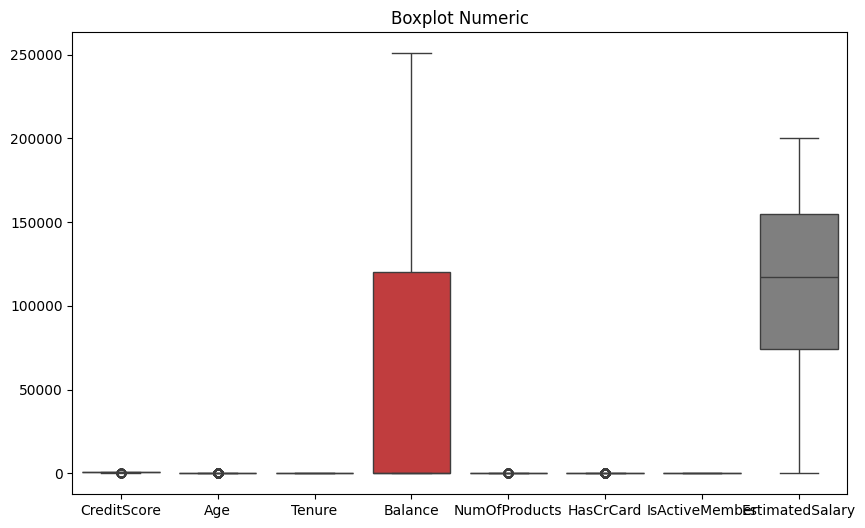

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=x_train[num_data])
plt.title('Boxplot Numeric')
plt.show()

In [42]:
x_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,33007.000000,33007.000000,33007.000000,33007.000000,33007.000000,33007.000000,33007.000000,33007.000000
mean,656.342108,38.057654,4.998909,55736.297630,1.554276,0.753658,0.495622,112222.522280
std,80.051595,8.792344,2.797309,62869.964295,0.546302,0.430886,0.499988,50463.153622
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74415.220000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.460000
75%,710.000000,42.000000,7.000000,120467.045000,2.000000,1.000000,1.000000,154775.700000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


Karena variasi terlalu luas, jika menggunakan min-max scaling dapat menyebabkan hilangnya informasi yang terkandung dalam distribusi data asli. Maka akan digunakan Standard Scalar

sebelum di standarisasi

In [44]:
from sklearn.preprocessing import StandardScaler

scaled_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

std_scaler = StandardScaler()

# Lakukan standarisasi pada data latih
x_train_scaled_temp = std_scaler.fit_transform(x_train[scaled_cols])
x_train_scaled = pd.DataFrame(x_train_scaled_temp, columns=scaled_cols)

# Lakukan standarisasi pada data uji
x_test_scaled_temp = std_scaler.transform(x_test[scaled_cols])
x_test_scaled = pd.DataFrame(x_test_scaled_temp, columns=scaled_cols)


In [45]:
filename = 'scaling.pkl'
pkl.dump(std_scaler, open(filename, 'wb'))

In [46]:
print(x_train_scaled.head())
print(x_test_scaled.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0     0.645317  0.789602 -1.072085 -0.886546      -1.014612         1.384287
1     0.245569 -0.347769  0.715373 -0.886546       0.815904         1.066763
2    -0.141687 -0.234032 -0.357102  1.244564      -1.014612         0.002202
3     1.682164 -0.120294 -1.429577 -0.886546       0.815904         0.411210
4    -0.241624  1.130813  0.715373 -0.886546       0.815904         0.680728
   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary
0     0.295538 -0.688980 -1.072085 -0.886546       0.815904        -1.458667
1    -0.641372 -0.688980 -0.714594 -0.886546       0.815904         0.511840
2     2.119389  0.107180  1.072865  0.925244       0.815904         1.225088
3     0.507904  0.675865 -0.714594 -0.886546      -1.014612         0.616985
4    -1.328440  2.040709 -1.072085  0.758006      -1.014612        -0.422976


In [47]:
x_train_scaled_df = x_train.copy()
x_test_scaled_df = x_test.copy()
y_train_scaled_df = y_train.copy()
y_test_scaled_df = y_test.copy()

In [48]:
x_train_scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,45.0,2,0.0,1,1,0,182076.97
6996,676.0,35.0,7,0.0,2,1,0,166053.92
26510,645.0,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,37.0,1,0.0,2,1,0,132973.17
17668,637.0,48.0,7,0.0,2,1,1,146573.66


In [49]:
x_test_scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.0,32.0,2,0.00,2,0,1,38614.69
4280,605.0,32.0,3,0.00,2,1,0,138051.19
36838,826.0,39.0,8,113905.48,2,0,1,174043.40
39035,697.0,44.0,3,0.00,1,1,1,143357.07
22201,550.0,56.0,2,103391.38,1,1,0,90878.13


In [50]:
x_train_scaled_df = x_train_scaled_df.assign(**{f"{col}_scaled": x_train_scaled[col] for col in x_train_scaled.columns})

In [51]:
x_train_scaled_df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'], inplace=True)

In [52]:
x_train_scaled_df.head()

,HasCrCard,IsActiveMember,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,EstimatedSalary_scaled
23629,1,0,-0.416514,-0.120294,0.715373,1.086652,0.815904,0.126216
6996,1,0,-0.129195,0.220917,0.715373,1.766266,0.815904,1.217908
26510,1,1,-1.116073,2.381920,-0.357102,-0.886546,0.815904,-1.711747
40020,1,0,NaN,NaN,NaN,NaN,NaN,NaN
17668,1,1,-0.341561,0.334654,0.000390,-0.886546,0.815904,-0.990831


In [53]:
x_test_scaled_df = x_test_scaled_df.assign(**{f"{col}_scaled": x_test_scaled[col] for col in x_test_scaled.columns})

In [54]:
x_test_scaled_df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'], inplace=True)

In [55]:
x_test_scaled_df.head()

,HasCrCard,IsActiveMember,CreditScore_scaled,Age_scaled,Tenure_scaled,Balance_scaled,NumOfProducts_scaled,EstimatedSalary_scaled
37555,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4280,1,0,-1.141058,-0.461506,-1.072085,1.398848,0.815904,-1.116936
36838,0,1,NaN,NaN,NaN,NaN,NaN,NaN
39035,1,1,NaN,NaN,NaN,NaN,NaN,NaN
22201,1,0,NaN,NaN,NaN,NaN,NaN,NaN


MODELING

In [56]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

def model_comparison(x_train, y_train, x_test, y_test):
    # random forest
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train, y_train)
    rf_pred_train = rf_model.predict(x_train)
    rf_pred_test = rf_model.predict(x_test)
    
    print("Random Forest:")
    print("\nClassification Report for Training Set:")
    print(classification_report(y_train, rf_pred_train))
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, rf_pred_test))

    print("\nParameters for Random Forest:")
    print(rf_model.get_params())
    

    # XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(x_train, y_train)
    xgb_pred_train = xgb_model.predict(x_train)
    xgb_pred_test = xgb_model.predict(x_test)
    
    print("\nXGBoost:")
    print("\nClassification Report for Training Set:")
    print(classification_report(y_train, xgb_pred_train))
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, xgb_pred_test))

    print("\nParameters for XGBoost:")
    print(xgb_model.get_params())


In [57]:
# menggunakan data tanpa scaling
model_comparison(x_train, y_train, x_test, y_test)

Random Forest:

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26027
           1       1.00      1.00      1.00      6980

    accuracy                           1.00     33007
   macro avg       1.00      1.00      1.00     33007
weighted avg       1.00      1.00      1.00     33007


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6513
           1       0.70      0.47      0.56      1739

    accuracy                           0.85      8252
   macro avg       0.78      0.71      0.73      8252
weighted avg       0.83      0.85      0.83      8252


Parameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 

In [58]:
# menggunakan data hasil scaling
model_comparison(x_train_scaled_df, y_train, x_test_scaled_df, y_test)

Random Forest:

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26027
           1       1.00      0.79      0.88      6980

    accuracy                           0.96     33007
   macro avg       0.97      0.89      0.93     33007
weighted avg       0.96      0.96      0.95     33007


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6513
           1       0.31      0.01      0.01      1739

    accuracy                           0.79      8252
   macro avg       0.55      0.50      0.45      8252
weighted avg       0.69      0.79      0.70      8252


Parameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 

karena data targeted column imbalance, terlihat bahwa pada kedua model masih cenderung mengarah overfitting ke kelas 0 

In [60]:
from sklearn.model_selection import GridSearchCV

def model_comparison_with_tuning(X_train, y_train, X_test, y_test):
    # Inisialisasi model Random Forest
    rf_clf = RandomForestClassifier(random_state=42)

    # Definisi grid parameter untuk Random Forest
    rf_param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Inisialisasi model XGBoost
    xgb_clf = XGBClassifier(random_state=42)

    # Definisi grid parameter untuk XGBoost
    xgb_param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01, 0.001]
    }

    # Tuning parameter untuk Random Forest
    rf_grid_search = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid_search.fit(X_train, y_train)
    rf_best_model = rf_grid_search.best_estimator_

    # Tuning parameter untuk XGBoost
    xgb_grid_search = GridSearchCV(xgb_clf, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    xgb_grid_search.fit(X_train, y_train)
    xgb_best_model = xgb_grid_search.best_estimator_

    # Evaluasi model terbaik dari Random Forest
    rf_y_train_pred = rf_best_model.predict(X_train)
    rf_y_test_pred = rf_best_model.predict(X_test)
    rf_train_report = classification_report(y_train, rf_y_train_pred)
    rf_test_report = classification_report(y_test, rf_y_test_pred)

    # Evaluasi model terbaik dari XGBoost
    xgb_y_train_pred = xgb_best_model.predict(X_train)
    xgb_y_test_pred = xgb_best_model.predict(X_test)
    xgb_train_report = classification_report(y_train, xgb_y_train_pred)
    xgb_test_report = classification_report(y_test, xgb_y_test_pred)

    print("Random Forest Best Parameters:", rf_grid_search.best_params_)
    print("Random Forest Training Classification Report:\n", rf_train_report)
    print("Random Forest Testing Classification Report:\n", rf_test_report)

    print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
    print("XGBoost Training Classification Report:\n", xgb_train_report)
    print("XGBoost Testing Classification Report:\n", xgb_test_report)

    return rf_best_model, xgb_best_model

In [61]:
rf_model, xgb_model = model_comparison_with_tuning(x_train, y_train, x_test, y_test)

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     26027
           1       0.81      0.50      0.62      6980

    accuracy                           0.87     33007
   macro avg       0.84      0.73      0.77     33007
weighted avg       0.86      0.87      0.86     33007

Random Forest Testing Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6513
           1       0.76      0.44      0.56      1739

    accuracy                           0.85      8252
   macro avg       0.81      0.70      0.73      8252
weighted avg       0.84      0.85      0.84      8252

XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
XGBoost Training Classification Report:
          

In [ ]:
rf_model_tuning_scale, xgb_model_tuning_scale = model_comparison_with_tuning(x_train_scaled_df, y_train, x_test_scaled_df, y_test)

sejauh ini sebenarnya antara Random Forest dan XGBoost memiliki akurasi yang sama. Namun jika melihat precision, recall, f1-score dari kelas 1, XGBoost lebih stabil dan dapat menghindari overfit ke kelas 0 pada dataset imbalance yang kita miliki.

dan tidak terdapat perbedaan jika menggunakan data yang discaling dan yang tidak. kemungkinan besar hasil standarisasi masih kurang tepat pada dataset tersebut.

Maka kita akan mengambil model XGBoost dengan parameter {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
import pickle as pkl
# Export the model to a pickle file
export_path = r"E:\MODEL DEPLOYMENT\2602090076_UTS_ModelDeployment"
filename = 'XG_churn.pkl'
pkl.dump(xgb_model_tuning_scale, open(filename, 'wb'))
 
loaded_model = pkl.load(open(filename, 'rb'))
result = loaded_model.score(x_test_scaled_df, y_test_scaled_df)
print(result)

print(f"XGBoost model trained and exported to: {export_path}")